In [3]:
import numpy as np

In [22]:
class perceptron(object):
    def _init_(self,eta=0.01,n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,x,y):
        self.w_=np.zeros(1+x.shape[1])
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for a,b in zip(x,y):
                update=self.eta*(b-self.predict(a))
                self.w_[1:]+=update*a
                self.w_[0]+=update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    def input_(self,x):
        return np.dot(x,self.w_[1:])+self.w_[0]
    def predict(self,x):
        return np.where(self.input_(x)>0.0,1,-1)


In [23]:
import pandas as pd

In [24]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail(5)

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
import matplotlib.pyplot as plt

In [26]:
y=df.iloc[0:100,4].values

In [27]:
y=np.where(y=='Iris-setosa',-1,1)

In [28]:
x=df.iloc[0:100,[0,2]].values

In [29]:
plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='setosa')
plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='versicolor')

In [30]:
plt.xlabel('petal length')
plt.ylabel('sepal length')

In [31]:
plt.legend(loc='upper right')

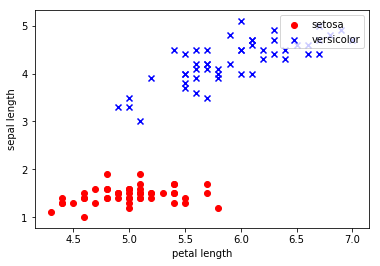

In [32]:
plt.show()

In [33]:
ppn=perceptron()

In [34]:
ppn.eta=0.1

In [35]:
ppn.n_iter=10

In [36]:
ppn.x=x

In [37]:
ppn.y=y

In [38]:
ppn.fit(x,y)

In [39]:
print(ppn.w_)

[-0.4  -0.7   1.84]


In [40]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')

In [41]:
plt.xlabel("epochs")

In [42]:
plt.xlabel("errors")

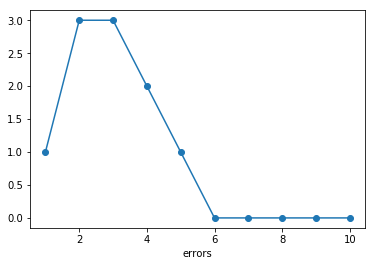

In [43]:
plt.show()

In [44]:
from matplotlib.colors import ListedColormap

In [45]:
def plot_decision_region(x,y,classifier,resolution=0.02):
   markers=('s','x','o','^','v')
   colors=('red','blue','lightgreen','gray','cyan')
   cmap=ListedColormap(colors[:len(np.unique(y))])
   x1_min,x1_max=x[:,0].min()-1,x[:,0].max()+1
   x2_min,x2_max=x[:,1].min()-1,x[:,0].max()+1
   xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
   z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
   z=z.reshape(xx1.shape)
   plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
   plt.xlim(xx1.min(),xx1.max())
   plt.ylim(xx2.min(),xx2.max())
   for idx,cl in enumerate(np.unique(y)):
       plt.scatter(x=x[y==cl,0],y=x[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)


    

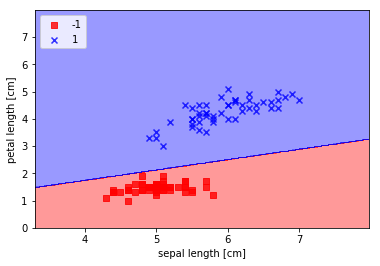

In [46]:
plot_decision_region(x,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()